# Ex 1 week 5
## Tiling of the sky

## Colab Dependencies

In [ ]:
%pip install camb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for camb: filename=camb-1.5.0-py3-none-any.whl size=1064772 sha256=c54713ecdb86d2132ca639d183f8a2e5d92b4e2530ec2df534d9ec81946dcf78
  Stored in directory: /root/.cache/pip/wheels/56/8e/da/c29f503739e0e2dcf9b93784cd7067004e33cd930449600c50
Successfully built camb


## Real Code

In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import camb as camb

In [ ]:
# define parameters:
Omegam = 0.3
OmegaL = 1 - Omegam
H0 = 70.0 / (299792)

In [ ]:
# set up the redshift grid where we want to do the calculation:
redshift = np.linspace(0.5, 1100.0, 1000)
# since we want to do log plots usually logspace is better:
#redshift = np.logspace(-1., 3., 100)

$R_h(z)=a(z)\int_z^\infty \frac{dz'}{H(z')}= \frac{\eta(z)}{1+z}$ physical size of the horizon

$R_a(z) = \frac{R_p(z)}{1+z}=\frac{1}{1+z}\int_0^z \frac{dz'}{H(z')}$ angular diameter distance (k=0)

$\theta(z)=\frac{R_h(z)}{R_a(z)}$

Text(0.5, 1.0, 'physical size of the horizon')

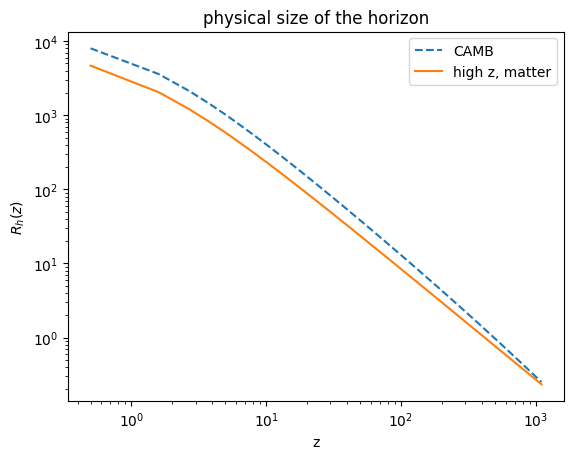

In [ ]:
# set parameters to match our cosmological model:
pars = camb.CAMBparams()
pars.set_cosmology(H0=70.0, ombh2=0.05*(70.0/100)**2, omch2=(Omegam-0.05)*(70.0/100)**2);
# set_cosmology wants the PHYSICAL DENSITIES, that is the density parameter multiplied by (H0/100)^2
# camb prende H0 in km/s/Mpc

# calculate background results:
results = camb.get_background(pars)

# calculate physical size of the horizon as a(t)eta(t)=eta(z)/(1+z):
R_h = results.conformal_time(redshift)/(1+redshift)
plt.plot(redshift, R_h, linestyle='--', label='CAMB')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$R_h(z)$')
plt.legend()

##asymptotic behavior at high z in a matter dominated universe
def rHor(z):
    return 2/H0*(1+z)**(-3.0/2)
plt.plot(redshift, rHor(redshift), label='high z, matter')
plt.legend()
plt.title('physical size of the horizon')

Text(0.5, 1.0, 'angular diameter distance')

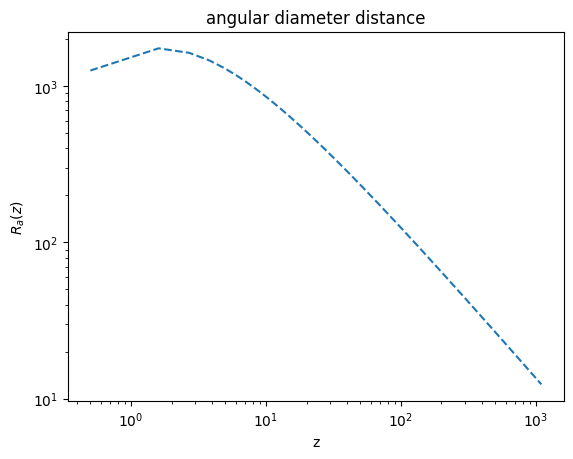

In [ ]:
R_a = results.angular_diameter_distance(redshift)  ##not comoving

plt.plot(redshift, R_a, linestyle='--', label='CAMB')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$R_a(z)$')
plt.title('angular diameter distance')

### Dimensione angolare dell'orizzonte

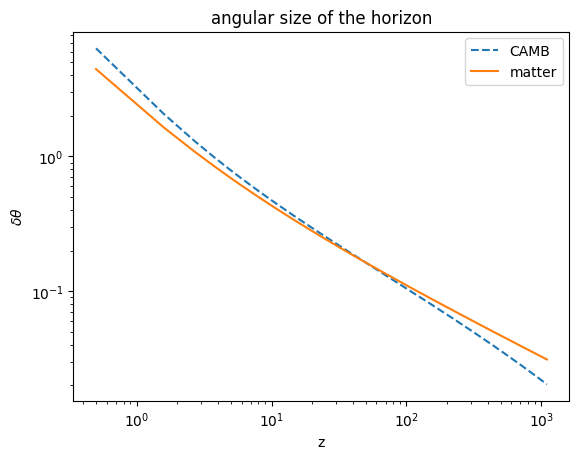

In [ ]:
##calcolo l'angolo sotteso dall'orizzonte al variare di z
angle=R_h/R_a
plt.plot(redshift,angle, linestyle='--',label='CAMB')

def angle_matter(z):
    return (1+z)**(-1.0/2)/(1-(1+z)**(-1.0/2))
angle_m=angle_matter(redshift)

plt.plot(redshift,angle_m,label='matter')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$\delta \\theta$')
plt.title('angular size of the horizon')
plt.legend()


Text(0.5, 1.0, 'CAMB - matter dominated universe')

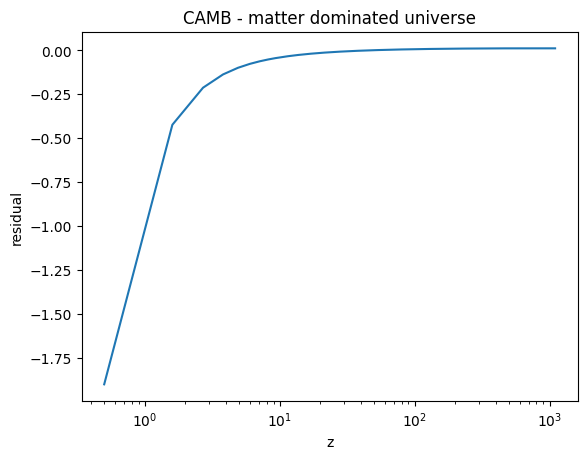

In [ ]:
##difference between the camb calculations and the matter dominated universe calculations

plt.plot(redshift, angle_m-angle, label='residual')
plt.xlabel('z')
plt.ylabel('residual')
plt.xscale('log')
plt.title('CAMB - matter dominated universe')

In [ ]:
##misure degli angoli in gradi calcolate con CAMB e con conto manuale (materia)
##il secondo viene 1.7 gradi come deve, il primo un po' meno

print(180/np.pi*angle[len(angle)-1])
print(180/np.pi*angle_m[len(angle_m)-1])

1.1642305634426051
1.780404888023603


### Area sottesa da un orizzonte

In [ ]:
##area cielo = 4pi
##area mattonella = angolo x angolo
area=np.pi*angle*angle/4
totA=4*np.pi*np.ones(len(area))
n_tiles=totA/area

Text(0.5, 1.0, 'number of tiles in the sky')

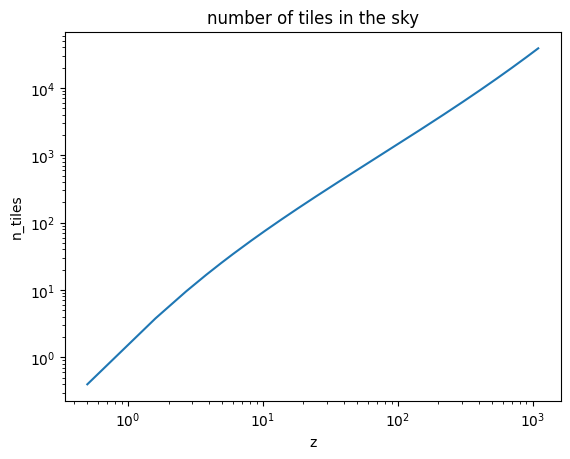

In [ ]:
plt.plot(redshift, n_tiles)
plt.xlabel('z')
plt.ylabel('n_tiles')
plt.xscale('log')
plt.yscale('log')
plt.title('number of tiles in the sky')